<a href="https://colab.research.google.com/github/matteoxpo/MLStudy/blob/main/KNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
print(raw_df)

             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

In [2]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [3]:
from matplotlib import pyplot as plt

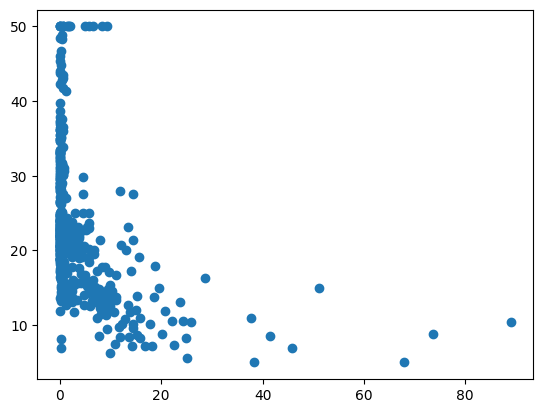

In [4]:
plt.scatter(data[:, 0], target)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)
print(type(X_train))
print(type(X_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
knn = KNeighborsRegressor(n_neighbors=5, weights="uniform", p = 2)

In [9]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [10]:
knn.predict(X_test)

array([38.74, 11.14, 22.98, 11.22, 13.96, 26.1 , 23.38, 23.82, 13.84,
       16.62, 26.1 , 22.98, 13.96, 16.54, 20.2 , 20.78, 16.72, 16.62,
       30.38, 22.18, 22.98, 21.74, 29.94, 36.38, 28.28, 17.82, 24.76,
       21.46, 12.28, 18.66, 34.02, 15.32, 11.02, 33.24, 19.6 , 25.7 ,
       11.32, 29.5 , 22.98, 26.42, 39.06, 23.38, 19.56, 19.66, 12.54,
       20.88, 12.2 , 24.8 , 20.  , 14.42, 20.08, 23.48, 21.14, 19.56,
       22.7 , 27.18, 15.84, 11.86, 32.22, 15.68, 19.04, 36.3 , 21.8 ,
       21.46, 19.72, 16.62, 27.62, 23.42, 27.28, 10.96, 33.56, 17.48,
       23.44, 20.46, 16.64, 10.38, 21.28, 34.82, 21.98, 16.62, 27.12,
       22.04, 10.96, 24.66, 20.06, 26.3 , 16.62, 26.74, 30.82, 12.34,
       13.2 , 20.82, 32.72, 23.38, 19.76, 25.42, 19.54, 23.5 , 29.42,
       24.28, 32.84, 13.72])

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
mean_squared_error(Y_test, knn.predict(X_test))

32.934549019607836

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
      "n_neighbors": [1, 5, 10, 20],
      "weights": ["uniform", "distance"],
      'p': [1, 2, 3]
  },
    cv=5
)

In [15]:
grid_searcher.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5, 10, 20], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [16]:
grid_searcher.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [17]:
mean_squared_error(Y_test, grid_searcher.predict(X_test))

23.854474579274147

In [18]:
MSE = []
for i in range(1, 30, 3):
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(X_train, Y_train)
  MSE.append(mean_squared_error(Y_test, knn.predict(X_test)))

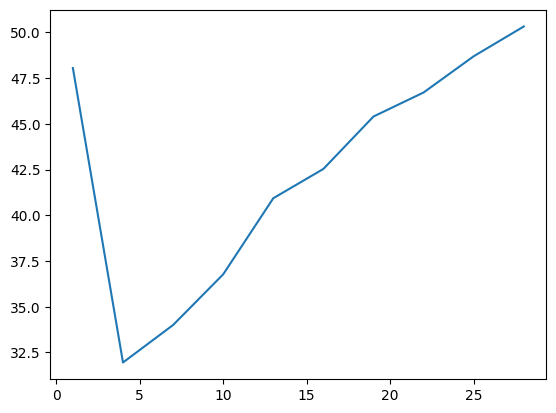

In [19]:
plt.plot(range(1, 30, 3), MSE)

### Теперь попробуем решить задачу классификации

In [20]:
from sklearn.datasets import make_moons

In [21]:
X, Y = make_moons(n_samples=1000, noise=0.25)

In [22]:
X.shape

(1000, 2)

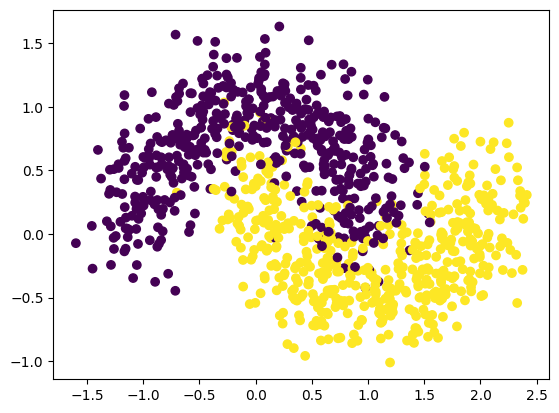

In [23]:
plt.scatter(X[:,0], X[:, 1], c=Y)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [28]:
knn.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(Y_test, knn.predict(X_test))

0.9

In [31]:
import numpy as np

In [32]:
x_space = np.linspace(-2, 3, 100)

In [33]:
x_grid, y_grid = np.meshgrid(x_space,x_space)

In [34]:
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2)

In [35]:
xy

array([[-2.        , -2.        ],
       [-1.94949495, -2.        ],
       [-1.8989899 , -2.        ],
       ...,
       [ 2.8989899 ,  3.        ],
       [ 2.94949495,  3.        ],
       [ 3.        ,  3.        ]])

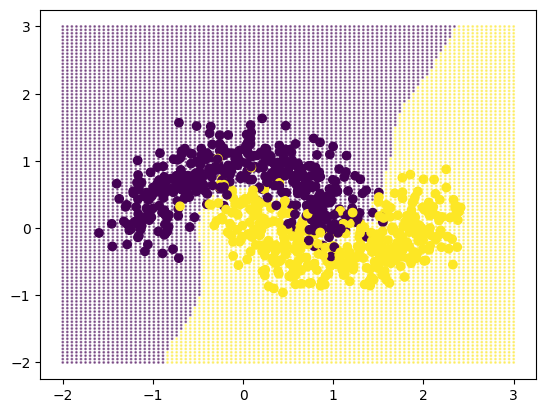

In [36]:
plt.scatter(xy[:,0], xy[:,1], s=1,alpha=0.5, c=knn.predict(xy))
plt.scatter(X_train[:,0], X_train[:,1],c =Y_train)